# Titanic Classification problem

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#open data in pandas dataframe
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# print column names
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


## Null values

In [5]:
print('Train columns with null values:\n', train_df.isnull().sum())
print("-"*10)

print('Test/Validation columns with null values:\n', test_df.isnull().sum())

# as we see there are some null values in data, which we are going to deal with later

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Test/Validation columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [6]:
# dealing with null values 

# filling Age column null values with median value of the data
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)
test_df['Age'].fillna(test_df['Age'].median(), inplace = True)

# only in train data there is null values for Embarked column
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace = True)

# filling Fare column null values with median value of the data
test_df['Fare'].fillna(test_df['Fare'].median(), inplace = True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace = True)

    
drop_column = ['PassengerId','Cabin', 'Ticket']

train_df.drop(drop_column, axis=1, inplace = True)
test_df.drop(drop_column, axis=1, inplace = True)

print(train_df.isnull().sum())
print("-"*40)
print(test_df.isnull().sum())
# as we see there is no more null values left

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------------------------------------
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


## Preprocessing

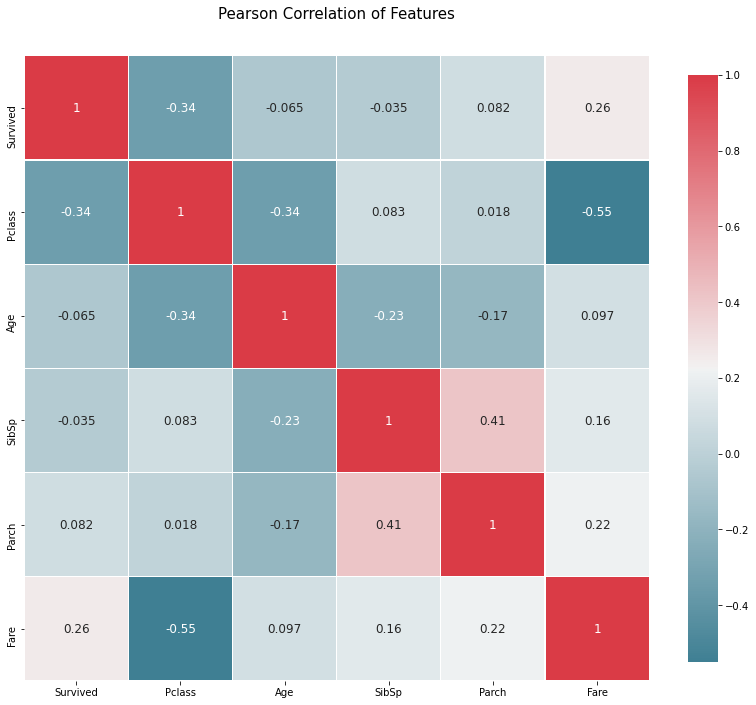

In [7]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(train_df)

In [8]:
# check the survival rate per class
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# first class has the highest survival rate

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# women are more likely to survive

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
# is alone 1; is not alone 0
train_df['IsAlone'] = 0
train_df.loc[(train_df['Parch'] == 0) & (train_df['SibSp'] == 0), 'IsAlone'] = 1

test_df['IsAlone'] = 0
test_df.loc[(test_df['Parch'] == 0) & (test_df['SibSp'] == 0), 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

# people who were alone are less likely to survive

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [11]:
# now as we have IsAlone column we are going to remove 
train_df = train_df.drop(['Parch', 'SibSp'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp'], axis=1)

train_df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,IsAlone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,0
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,1


In [12]:
train_df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


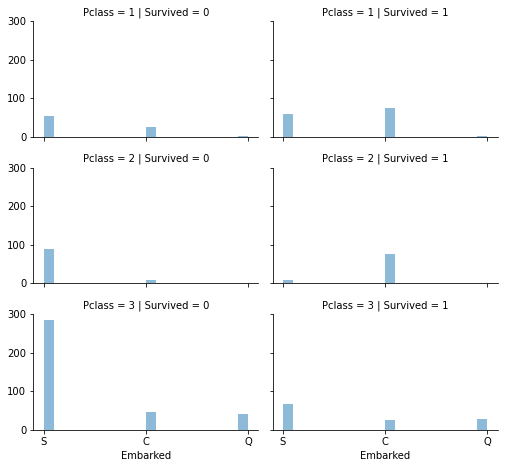

In [13]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Embarked', alpha=.5, bins=20)
grid.add_legend();

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


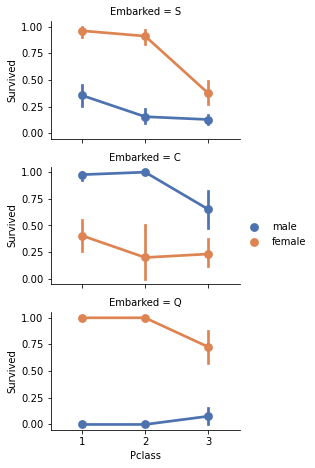

In [14]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()
# as we see C embarked men are more likely to survive then C embarked women

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


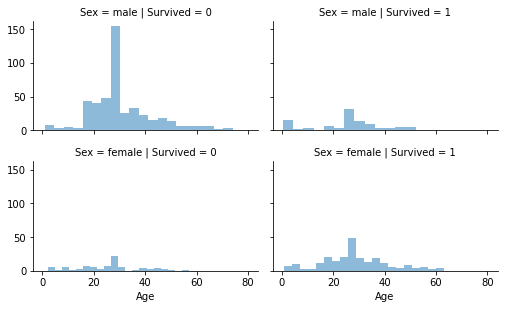

In [15]:
grid = sns.FacetGrid(train_df, col='Survived', row='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


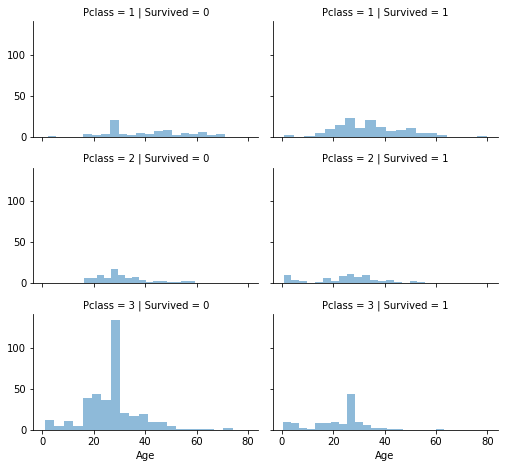

In [16]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

Text(0.5, 1.0, 'Sex vs IsAlone Survival Comparison')

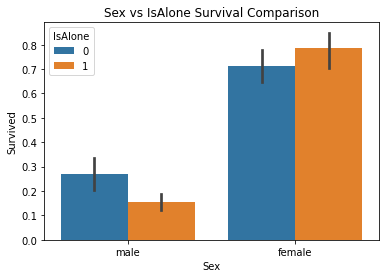

In [17]:
grid = sns.barplot(x = 'Sex', y = 'Survived', hue = 'IsAlone', data=train_df)
grid.set_title('Sex vs IsAlone Survival Comparison')

Text(0.5, 1.0, 'Sex vs Pclass Survival Comparison')

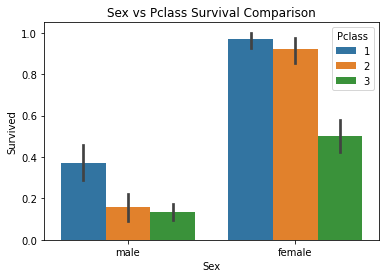

In [18]:
grid = sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data=train_df)
grid.set_title('Sex vs Pclass Survival Comparison')

In [19]:
train_df['Title'] = train_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [20]:
train_df['Title'] = train_df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_df['Title'] = train_df['Title'].replace('Mlle', 'Miss')
train_df['Title'] = train_df['Title'].replace('Ms', 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')

test_df['Title'] = test_df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test_df['Title'] = test_df['Title'].replace('Mlle', 'Miss')
test_df['Title'] = test_df['Title'].replace('Ms', 'Miss')
test_df['Title'] = test_df['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [21]:
# Now as we have created the title column we remove names column
train_df = train_df.drop('Name', axis=1)
test_df = test_df.drop('Name', axis=1)

train_df.head()


,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title
0,0,3,male,22.0,7.2500,S,0,Mr
1,1,1,female,38.0,71.2833,C,0,Mrs
2,1,3,female,26.0,7.9250,S,1,Miss
3,1,1,female,35.0,53.1000,S,0,Mrs
4,0,3,male,35.0,8.0500,S,1,Mr


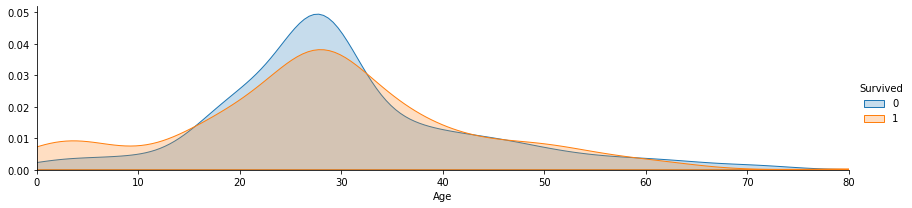

In [22]:
#plot distributions of age of passengers who survived or did not survive
grid = sns.FacetGrid(train_df, hue = 'Survived', aspect=4 )
grid.map(sns.kdeplot, 'Age', shade= True )
grid.set(xlim=(0 , train_df['Age'].max()))
grid.add_legend()

In [23]:
train_df.loc[ train_df['Age'] <= 16, 'Age'] = 0
train_df.loc[(train_df['Age'] > 16) & (train_df['Age'] <= 32), 'Age'] = 1
train_df.loc[(train_df['Age'] > 32) & (train_df['Age'] <= 64), 'Age'] = 2
train_df.loc[ train_df['Age'] > 64, 'Age'] = 3
train_df['Age'] = train_df['Age'].astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title
0,0,3,male,1,7.2500,S,0,Mr
1,1,1,female,2,71.2833,C,0,Mrs
2,1,3,female,1,7.9250,S,1,Miss
3,1,1,female,2,53.1000,S,0,Mrs
4,0,3,male,2,8.0500,S,1,Mr


In [24]:
test_df.loc[ test_df['Age'] <= 16, 'Age'] = 0
test_df.loc[(test_df['Age'] > 16) & (test_df['Age'] <= 32), 'Age'] = 1
test_df.loc[(test_df['Age'] > 32) & (test_df['Age'] <= 64), 'Age'] = 2
test_df.loc[ test_df['Age'] > 64, 'Age'] = 3
test_df['Age'] = test_df['Age'].astype(int)
test_df.head()

,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title
0,3,male,2,7.8292,Q,1,Mr
1,3,female,2,7.0000,S,0,Mrs
2,2,male,2,9.6875,Q,1,Mr
3,3,male,1,8.6625,S,1,Mr
4,3,female,1,12.2875,S,0,Mrs


In [25]:
# transform categorical data to numeric data
train_df['Embarked'] = train_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test_df['Embarked'] = test_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df['Sex'] = train_df['Sex'].map( {'male': 0, 'female': 1} ).astype(int)
test_df['Sex'] = test_df['Sex'].map( {'male': 0, 'female': 1} ).astype(int)

train_df['Title'] = train_df['Title'].map( {'Mr': 0, 'Mrs': 1, 'Miss': 2, 'Master': 3, 'Rare': 4} ).astype(int)
test_df['Title'] = test_df['Title'].map( {'Mr': 0, 'Mrs': 1, 'Miss': 2, 'Master': 3, 'Rare': 4}  ).astype(int)


train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title
0,0,3,0,1,7.2500,0,0,0
1,1,1,1,2,71.2833,1,0,1
2,1,3,1,1,7.9250,0,1,2
3,1,1,1,2,53.1000,0,0,1
4,0,3,0,2,8.0500,0,1,0


In [26]:
test_df.head()

,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title
0,3,0,2,7.8292,2,1,0
1,3,1,2,7.0000,0,0,1
2,2,0,2,9.6875,2,1,0
3,3,0,1,8.6625,0,1,0
4,3,1,1,12.2875,0,0,1


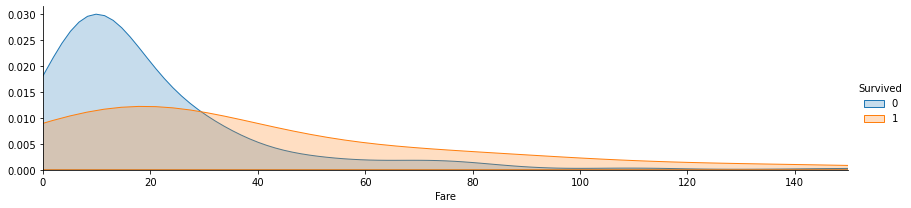

In [27]:
#plot distributions of fare of passengers who survived or did not survive
grid = sns.FacetGrid(train_df, hue = 'Survived', aspect=4 )
grid.map(sns.kdeplot, 'Fare', shade= True )
grid.set(xlim=(0 , train_df['Fare'].max()))
grid.add_legend()
grid.set(xlim=(0, 150))

In [28]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [29]:
train_df.loc[ train_df['Fare'] <= 7.91, 'Fare'] = 0
train_df.loc[(train_df['Fare'] > 7.91) & (train_df['Fare'] <= 14.454), 'Fare'] = 1
train_df.loc[(train_df['Fare'] > 14.454) & (train_df['Fare'] <= 31), 'Fare']   = 2
train_df.loc[ train_df['Fare'] > 31, 'Fare'] = 3
train_df['Fare'] = train_df['Fare'].astype(int)

test_df.loc[ test_df['Fare'] <= 7.91, 'Fare'] = 0
test_df.loc[(test_df['Fare'] > 7.91) & (test_df['Fare'] <= 14.454), 'Fare'] = 1
test_df.loc[(test_df['Fare'] > 14.454) & (test_df['Fare'] <= 31), 'Fare']   = 2
test_df.loc[ test_df['Fare'] > 31, 'Fare'] = 3
test_df['Fare'] = test_df['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title
0,0,3,0,1,0,0,0,0
1,1,1,1,2,3,1,0,1
2,1,3,1,1,1,0,1,2
3,1,1,1,2,3,0,0,1
4,0,3,0,2,1,0,1,0


In [30]:
test_df.head()

,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title
0,3,0,2,0,2,1,0
1,3,1,2,0,0,0,1
2,2,0,2,1,2,1,0
3,3,0,1,1,0,1,0
4,3,1,1,1,0,0,1


## Machine Learning Models

In [31]:
# Logistic Regression
# KNN or k-Nearest Neighbors
# Support Vector Machines
# Kernel SVM
# Naive Bayes classifier
# Decision Tree
# Random Forrest
from sklearn.metrics import accuracy_score

In [32]:
train_x = train_df.iloc[:, 1:]
train_y = train_df['Survived']

In [33]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(train_x, train_y)

y_pred = classifier.predict(train_x)

acc_log=accuracy_score(train_y, y_pred)
acc_log

0.7946127946127947

In [34]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(train_x, train_y)

y_pred = classifier.predict(train_x)

acc_knn=accuracy_score(train_y, y_pred)
acc_knn

0.8406285072951739

In [35]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(train_x, train_y)

y_pred = classifier.predict(train_x)

acc_svc=accuracy_score(train_y, y_pred)
acc_svc

0.7867564534231201

In [36]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(train_x, train_y)

y_pred = classifier.predict(train_x)

acc_svm=accuracy_score(train_y, y_pred)
acc_svm

0.8383838383838383

In [37]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(train_x, train_y)

y_pred = classifier.predict(train_x)

acc_naive=accuracy_score(train_y, y_pred)
acc_naive

0.7811447811447811

In [38]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(train_x, train_y)

y_pred = classifier.predict(train_x)

acc_tree=accuracy_score(train_y, y_pred)
acc_tree

0.8585858585858586

In [39]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(train_x, train_y)

y_pred = classifier.predict(train_x)

acc_ran=accuracy_score(train_y, y_pred)
acc_ran

0.8552188552188552

In [40]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svm, acc_knn, acc_log, 
              acc_ran, acc_naive, acc_svc, acc_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
6,Decision Tree,0.858586
3,Random Forest,0.855219
1,KNN,0.840629
0,Support Vector Machines,0.838384
2,Logistic Regression,0.794613
5,Linear SVC,0.786756
4,Naive Bayes,0.781145
